In [21]:
import pandas as pd
import numpy as np
from constants import db_types
import matplotlib.pyplot as plt
import seaborn as sns


### Cargamos el dataset

In [13]:
malware_data_train = pd.read_csv('train.csv', dtype=db_types)

### Empieza la exploración de resultados

In [14]:
malware_data_train.head(10)

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0000028988387b115f69f31a3bf04f09,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,0,7.0,0,NaN,53447.0,...,36144.0,0,NaN,0.0,0,0,0.0,0.0,10.0,0.0
1,000007535c3f730efa9ea0b7ef1bd645,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,0,7.0,0,NaN,53447.0,...,57858.0,0,NaN,0.0,0,0,0.0,0.0,8.0,0.0
2,000007905a28d863f6d0d597892cd692,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1341.0,0,7.0,0,NaN,53447.0,...,52682.0,0,NaN,0.0,0,0,0.0,0.0,3.0,0.0
3,00000b11598a75ea8ba1beea8459149f,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,0,7.0,0,NaN,53447.0,...,20050.0,0,NaN,0.0,0,0,0.0,0.0,3.0,1.0
4,000014a5f00daa18e76b81417eeb99fc,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1379.0,0,7.0,0,NaN,53447.0,...,19844.0,0,0.0,0.0,0,0,0.0,0.0,1.0,1.0
5,000016191b897145d069102325cab760,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1094.0,0,7.0,0,NaN,53447.0,...,51039.0,0,0.0,0.0,0,0,0.0,0.0,15.0,1.0
6,0000161e8abf8d8b89c5ab8787fd712b,win8defender,1.1.15100.1,4.18.1807.18075,1.273.845.0,0,7.0,0,NaN,43927.0,...,63175.0,1,NaN,0.0,0,0,0.0,0.0,10.0,1.0
7,000019515bc8f95851aff6de873405e8,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1393.0,0,7.0,0,NaN,53447.0,...,63122.0,0,0.0,0.0,0,0,0.0,0.0,15.0,0.0
8,00001a027a0ab970c408182df8484fce,win8defender,1.1.15200.1,4.18.1807.18075,1.275.988.0,0,7.0,0,NaN,53447.0,...,15510.0,0,0.0,0.0,0,0,0.0,0.0,15.0,0.0
9,00001a18d69bb60bda9779408dcf02ac,win8defender,1.1.15100.1,4.18.1807.18075,1.273.973.0,0,7.0,0,NaN,46413.0,...,63555.0,1,0.0,0.0,0,0,0.0,1.0,8.0,1.0


In [15]:
# Forma
malware_data_train.shape

(8921483, 83)

In [16]:
malware_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8921483 entries, 0 to 8921482
Data columns (total 83 columns):
 #   Column                                             Dtype   
---  ------                                             -----   
 0   MachineIdentifier                                  category
 1   ProductName                                        category
 2   EngineVersion                                      category
 3   AppVersion                                         category
 4   AvSigVersion                                       category
 5   IsBeta                                             int8    
 6   RtpStateBitfield                                   float16 
 7   IsSxsPassiveMode                                   int8    
 8   DefaultBrowsersIdentifier                          float32 
 9   AVProductStatesIdentifier                          float32 
 10  AVProductsInstalled                                float16 
 11  AVProductsEnabled                    

#### Observar los nulls con sus procentajes en cada columna

In [17]:
# Function to help return missing values with its percentage


def missing_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
        columns={0: 'Missing Values', 1: '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
    return mis_val_table_ren_columns

In [18]:
print(missing_table(malware_data_train))

                                                   Missing Values  \
PuaMode                                                   8919174   
Census_ProcessorClass                                     8884852   
DefaultBrowsersIdentifier                                 8488045   
Census_IsFlightingInternal                                7408759   
Census_InternalBatteryType                                6338429   
Census_ThresholdOptIn                                     5667325   
Census_IsWIMBootEnabled                                   5659703   
SmartScreen                                               3177011   
OrganizationIdentifier                                    2751518   
SMode                                                      537759   
CityIdentifier                                             325409   
Wdft_RegionIdentifier                                      303451   
Wdft_IsGamer                                               303451   
Census_InternalBatteryNumberOfChar

#### Distribución de los datos por tipo

In [22]:
# Helper para poder sacar las columnas de cada tipo
def lists_by_type_count():
    binary = [c for c in malware_data_train.columns if malware_data_train[c].nunique() == 2]
    numerical = ['Census_ProcessorCoreCount',
                 'Census_PrimaryDiskTotalCapacity',
                 'Census_SystemVolumeTotalCapacity',
                 'Census_TotalPhysicalRAM',
                 'Census_InternalPrimaryDiagonalDisplaySizeInInches',
                 'Census_InternalPrimaryDisplayResolutionHorizontal',
                 'Census_InternalPrimaryDisplayResolutionVertical',
                 'Census_InternalBatteryNumberOfCharges']
    categorical = [c for c in malware_data_train.columns if (c not in numerical) & (c not in binary)]
    return binary, numerical, categorical
    
binary_columns, true_numerical_columns, categorical_columns = lists_by_type_count()

In [34]:
total = malware_data_train.shape[0]
missing_df = []
for col in malware_data_train.columns:
    missing_df.append([col, malware_data_train[col].count(), total])

    
missing_df = pd.DataFrame(missing_df, columns=['Columna', 'Numero de incidencias', 'Total']).sort_values("Numero de incidencias", ascending=False)
type_df = [['Columnas binarias', len(binary_columns)], ['Columnas númericas', len(true_numerical_columns)], ['Columnas categoricas', len(categorical_columns)]]
type_df = pd.DataFrame(type_df, columns=['Tipo de dato', 'Numero de columnas']).sort_values('Numero de columnas', ascending=True)


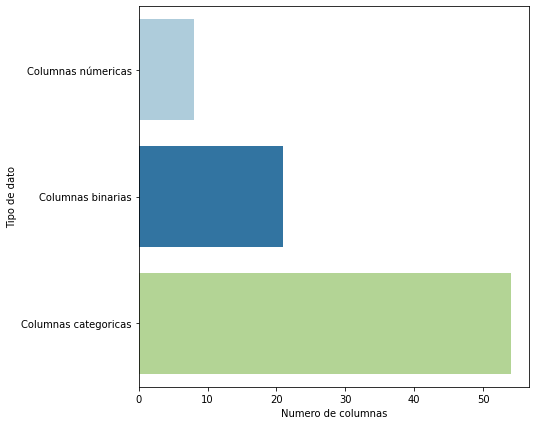

In [25]:
f, ax = plt.subplots(figsize=(7, 7))
sns.barplot(x="Numero de columnas", y="Tipo de dato", data=type_df, label="", palette='Paired')
plt.show()

Notamos que casi todo son variables categoricas

#### Ploteo de nulls

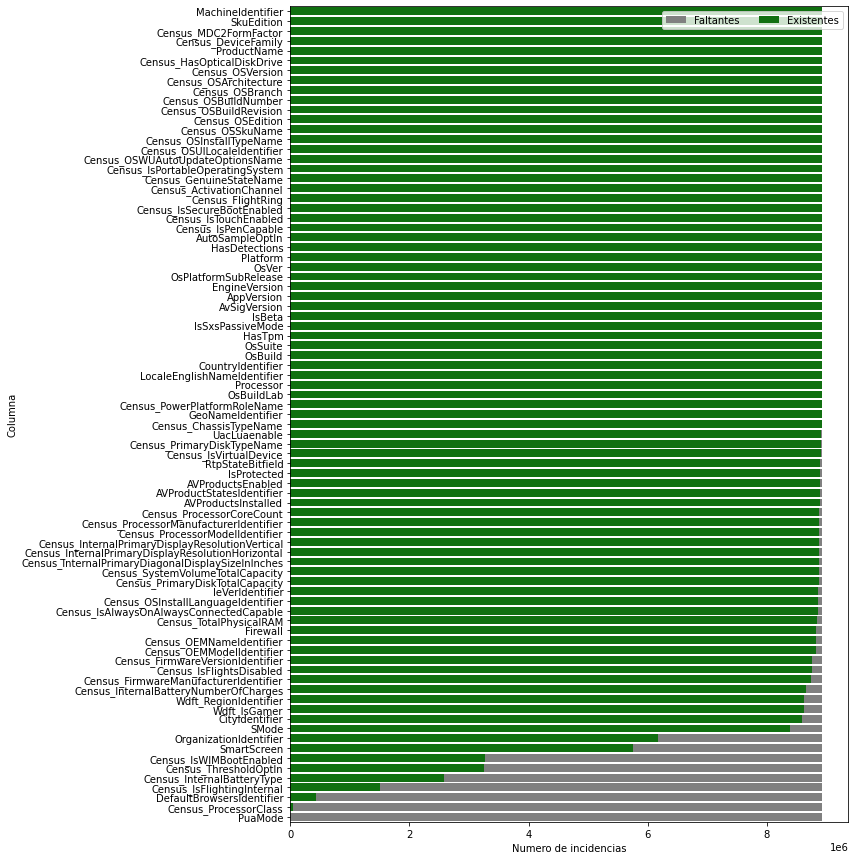

In [26]:
f, ax = plt.subplots(figsize=(10, 15))
sns.set_color_codes("pastel")
sns.barplot(x="Total", y="Columna", data=missing_df, label="Faltantes", color="gray")
sns.barplot(x="Numero de incidencias", y="Columna", data=missing_df, label="Existentes", color="green")
ax.legend(ncol=2, loc="upper right", frameon=True)
plt.show()

Una representación grafica de lo que pudimos observar arriba donde notamos que hay columnas que debemos botar las cuales serian puaMode, census_processorClass, DefaultIdentifiar  entre otras que tienenn muchos nulls

#### Unique count de cada columna

In [35]:
def unique_val(data, columns):
    unique = []
    for col in columns:
        u = data[col].nunique()
        unique.append((col,u,data[col].value_counts(normalize=True).values[0] * 100))
    return unique

In [37]:
unique1 = unique_val(malware_data_train, categorical_columns)
unique_values_g = pd.DataFrame(unique1, columns = ['Features','unique_values','PP']).sort_values('unique_values',ascending = False)
unique_values_g

,Features,unique_values,PP
0,MachineIdentifier,8921483,0.000011
29,Census_OEMModelIdentifier,175365,3.455872
11,CityIdentifier,107366,1.102969
52,Census_FirmwareVersionIdentifier,50494,1.022799
7,AVProductStatesIdentifier,28970,65.553104
4,AvSigVersion,8531,1.146861
28,Census_OEMNameIdentifier,3832,14.585025
31,Census_ProcessorModelIdentifier,3428,3.257640
6,DefaultBrowsersIdentifier,2017,10.625741
51,Census_FirmwareManufacturerIdentifier,712,30.888169


In [39]:
# Las columnas con un balance donde el el procentaje del grupo que abarca mas del 85% de todas las incidencias
imbalanced_columns = unique_values_g[unique_values_g['PP'] > 85.0]
imbalanced_columns

,Features,unique_values,PP
17,OsVer,58,96.761323
25,UacLuaenable,11,99.392547
50,Census_FlightRing,10,93.657960
5,RtpStateBitfield,7,97.326206
30,Census_ProcessorManufacturerIdentifier,7,88.278918
1,ProductName,6,98.935569
9,AVProductsEnabled,6,97.398377
48,Census_GenuineStateName,5,88.299187
15,Platform,4,96.606304
16,Processor,3,90.853001


Notamos que todas estas columnas mas del 85% de los datos lo ocupa una sola clase

In [40]:
imbalanced_columns_by_count = unique_values_g[unique_values_g['unique_values'] > 300]
imbalanced_columns_by_count

,Features,unique_values,PP
0,MachineIdentifier,8921483,0.000011
29,Census_OEMModelIdentifier,175365,3.455872
11,CityIdentifier,107366,1.102969
52,Census_FirmwareVersionIdentifier,50494,1.022799
7,AVProductStatesIdentifier,28970,65.553104
4,AvSigVersion,8531,1.146861
28,Census_OEMNameIdentifier,3832,14.585025
31,Census_ProcessorModelIdentifier,3428,3.257640
6,DefaultBrowsersIdentifier,2017,10.625741
51,Census_FirmwareManufacturerIdentifier,712,30.888169


De estas variables todas excepto MachineIdentifier hay qie recosar si alta cardinalidad primcipalmente AvSigVersion y OsBuildLab

## Observemos como se enceuntran distribuidos nuestros valores para detección

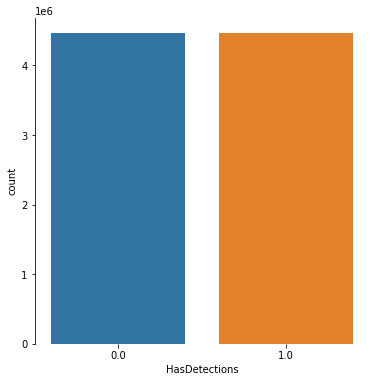

In [33]:
f, ax = plt.subplots(figsize=(6, 6))
ax = sns.countplot(x="HasDetections", data=malware_data_train, label="Count")
sns.despine(bottom=True)

Notamos que esta balanceado de manera perfecta

## Comparaciones con has detecions

### Si es de gamer 

In [43]:
# this function will plot percentages on the bar graphs on seaborn plots with 'hue' 
# it takes the actual graph, feature, Number_of_categories in feature 
# and hue_categories(number of cateogories in hue feature) as a paramater
def with_hue(plot, feature, Number_of_categories,hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)
    plt.show()

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


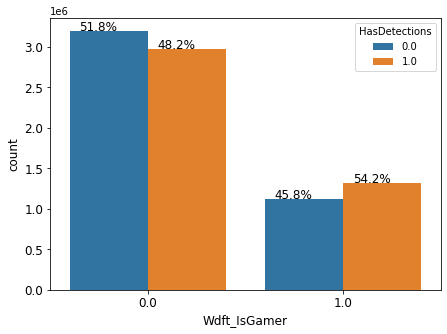

In [45]:
plt.figure(figsize = (7,5))
ax = sns.countplot('Wdft_IsGamer', hue= 'HasDetections', data = malware_data_train)
plt.xticks(size = 12)
plt.xlabel('Wdft_IsGamer', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)

with_hue(ax, malware_data_train.Wdft_IsGamer,2,2)

Notamos que estan bastante balanceados pero principalmente notamos que con una baja diferencia pero los que son gamers parecerian tener mas probabilidad de ataques

### Cores

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


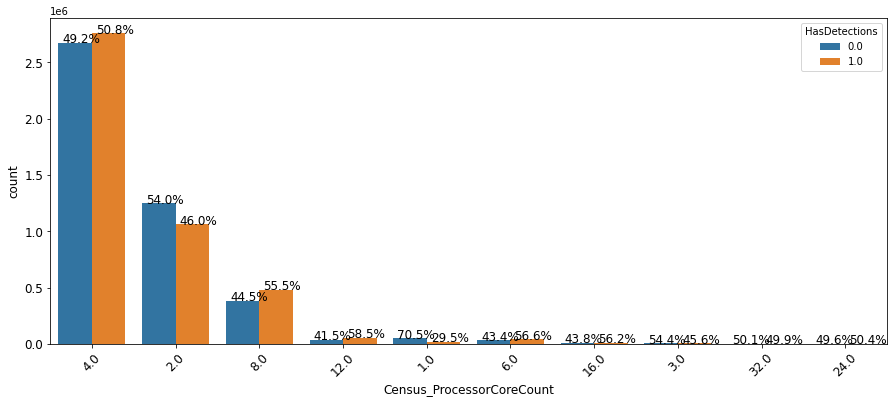

In [48]:
plt.figure(figsize = (15,6))
ax = sns.countplot('Census_ProcessorCoreCount', 
                   order = malware_data_train.Census_ProcessorCoreCount.value_counts().iloc[:10].index, 
                   hue = 'HasDetections', 
                   data = malware_data_train
                  )
plt.xticks(rotation = 45, size = 12)
plt.xlabel('Census_ProcessorCoreCount', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)

with_hue(ax, malware_data_train.Census_ProcessorCoreCount, 10,2)

A simple vosta notamos que los tres grupos mas populares son los quad core seguido de los dual core y octa core pareceria que en estos probablemente no sea un factor para la detección

### CountryIdentifier

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


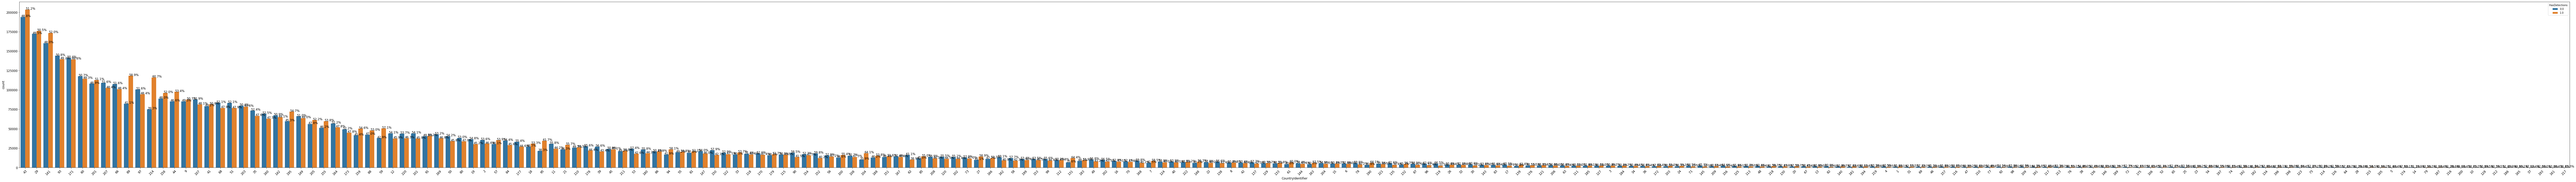

In [54]:
plt.figure(figsize = (180,12))
ax = sns.countplot('CountryIdentifier', 
                   order = malware_data_train.CountryIdentifier.value_counts().index, 
                   hue = 'HasDetections', 
                   data = malware_data_train
                  )
plt.xticks(rotation = 45, size = 12)
plt.xlabel('CountryIdentifier', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)

with_hue(ax, malware_data_train.CountryIdentifier, 222,2)

Notamos al abrir la imagen en otro tab que por país no afecta realmente mucho solo en el caso del país 89 o 214 o 95 pero no son la mayoría de incidencias si no que la mayoria esta bastante parejo